<a href="https://colab.research.google.com/github/SmartDogy/ML_Playground/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
X = []
Y = []
label = []

for i in range(10):
  a = np.random.randint(0, 100)
  b = np.random.randint(0, 100)
  target = np.random.randint(0, 2)

  X.append(a)
  Y.append(b)
  label.append(target)

In [3]:
dataset = pd.DataFrame()

In [4]:
dataset['1'] = X
dataset['2'] = Y
dataset['target'] = label

In [5]:
dataset

,1,2,target
0,3,31,1
1,35,67,1
2,30,29,1
3,61,34,1
4,31,71,1
5,48,48,1
6,84,45,0
7,20,74,1
8,2,55,0
9,27,56,0


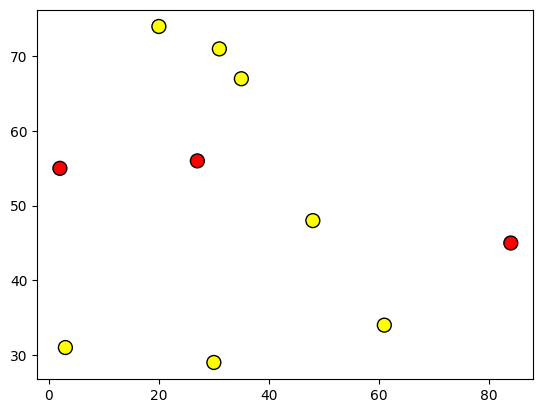

In [6]:
plt.scatter(dataset['1'], dataset['2'], c=dataset['target'], cmap='autumn', s=100, edgecolors='black')

In [7]:
dataset.shape

(10, 3)

In [8]:
dataset['weigths'] = 1/dataset.shape[0]

In [9]:
dataset

,1,2,target,weigths
0,3,31,1,0.1
1,35,67,1,0.1
2,30,29,1,0.1
3,61,34,1,0.1
4,31,71,1,0.1
5,48,48,1,0.1
6,84,45,0,0.1
7,20,74,1,0.1
8,2,55,0,0.1
9,27,56,0,0.1


In [10]:
X = dataset.iloc[:, [0,1]].values
Y = dataset.iloc[:, [2]].values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
dt = DecisionTreeClassifier(max_depth=1)

In [13]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [14]:
print(accuracy_score(y_test, dt.predict(x_test)))

0.5


<Axes: >

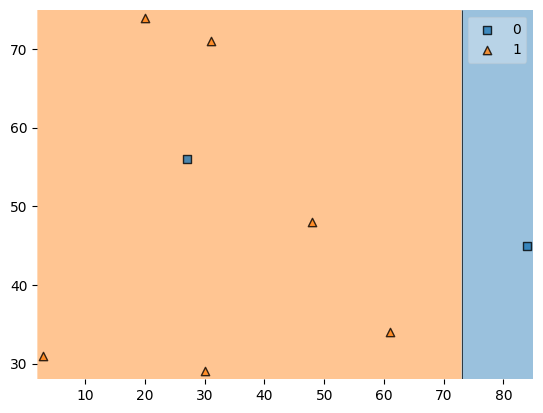

In [18]:
plot_decision_regions(x_train, y_train.ravel(), clf=dt)

In [19]:
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=2)

In [20]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=2)

In [21]:
print(accuracy_score(y_test, clf.predict(x_test)))

1.0


<Axes: >

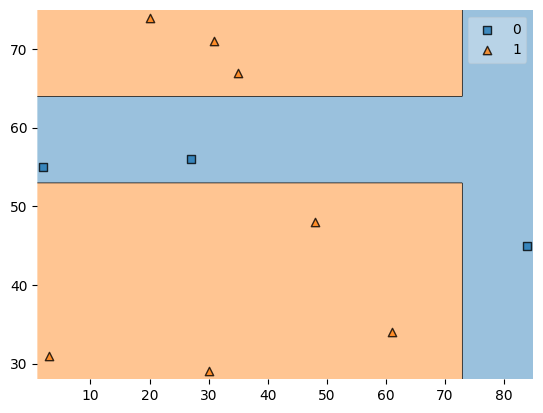

In [26]:
plot_decision_regions(X, Y.ravel(), clf=clf)

In [47]:
n_estimators = [10, 30, 50, 70, 100]
learning_rate = [0, 1, 0.01, 0.1]

param_grid = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate
}

In [48]:
grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=5)

In [49]:
grid.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0, 1, 0.01, 0.1],
                         'n_estimators': [10, 30, 50, 70, 100]})

In [50]:
print(grid.best_score_)
print(grid.best_params_)

0.8
{'learning_rate': 0.01, 'n_estimators': 10}


In [51]:
main_clf = AdaBoostClassifier(n_estimators=10, learning_rate=0.01, estimator=DecisionTreeClassifier())

In [52]:
main_clf.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   n_estimators=10)

In [53]:
accuracy_score(y_test, main_clf.predict(x_test))

1.0

<Axes: >

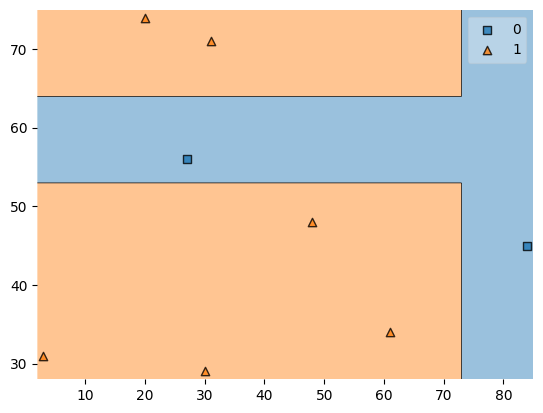

In [55]:
plot_decision_regions(x_train, y_train.ravel() ,main_clf)